In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from autograd import grad, hessian

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.trust_region.trust_region import TrustRegion

In [4]:
def plot_contour(f, xs=10, ys=10, lines=50):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, lines)

In [5]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))

def print_meta_state(meta, m, latest_point):
    print("delta for next iter", meta['delta'])
    print("rho", meta['rho'])
    print("p", meta['direction'])
    print("p_norm", np.linalg.norm(meta['direction'][0]))
    print("m", m(meta['direction'][0], latest_point))
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8], lambda_init=1, delta_init=100, max_iterations=1000):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def m(p, x):
        return F.f(x) + np.array(F.gradient(x)).T @ p + 0.5 * p.T @ F.hessian(x) @ p
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def meta_f(meta):
        if debug:
            print_meta_state(meta, m, xk_at_i[-1])
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, lambda_init=lambda_init, delta_init=delta_init, meta_callback=meta_f, max_iterations=max_iterations))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [6]:
def plot_delta_from_function(minimize, F, g_tol=0.5, debug=False, start_point=[8,8], delta_init=10, lambda_init=1):
    delta_at_i = []
    p_at_i = []
    rho_at_i = []
    x_at_i = []
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        x_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def m(meta):
        delta_at_i.append(meta['delta'])
        p_at_i.append(meta['direction'])
        rho_at_i.append(meta['rho'])
    minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, meta_callback=m, delta_init=delta_init, lambda_init=lambda_init)
    plt.xlabel('iterations')
    plt.ylabel('trust region radius')
    plt.plot(delta_at_i)
    return delta_at_i, p_at_i, rho_at_i, x_at_i
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    #plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    #plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

The newton step is outside the trust region 11.313708498984761
p [-4.01768524 -7.99207828]
||p|| 8.945116541942014
p [-0.4676945  -7.87320066]
||p|| 7.887079738621785
p [-0.01536151 -5.26391282]
||p|| 5.263935238312371
p [-0.00409916 -2.71129339]
||p|| 2.711296492113245
p [-0.00182719 -1.48773293]
||p|| 1.4877340502045182
p [-0.00118169 -1.02973642]
||p|| 1.0297371014223766
p [-0.00115722 -1.01110833]
||p|| 1.0111089956627999
p [-0.00116448 -1.01664462]
||p|| 1.0166452864016253
p [-0.00115368 -1.00840176]
||p|| 1.0084024169203414
p [-0.0011584  -1.01200423]
||p|| 1.0120048916361701
----
The newton step is outside the trust region 11.313708498984761
p [-4.01768524 -7.99207828]
||p|| 8.945116541942014
p [-0.4676945  -7.87320066]
||p|| 7.887079738621785
p [-0.01536151 -5.26391282]
||p|| 5.263935238312371
p [-0.00409916 -2.71129339]
||p|| 2.711296492113245
p [-0.00182719 -1.48773293]
||p|| 1.4877340502045182
p [-0.00118169 -1.02973642]
||p|| 1.0297371014223766
p [-0.00115722 -1.01110833]
|

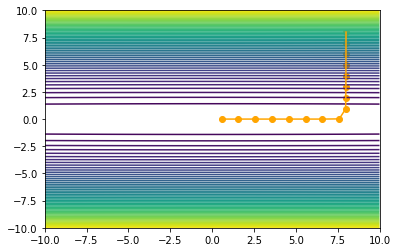

In [13]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1, delta_init=1, start_point=[8,8])

-----
norm of p:  11.313708498984761
delta:  100000000.0
[0. 0.]


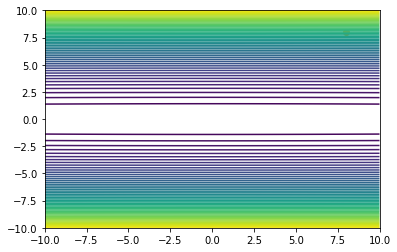

In [8]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=0, delta_init=1e8)

[  -0.31521977 -303.28167115] 34.16799110459078
[  -0.31516046 -303.22677055] 34.17648415010719
[  -0.31514564 -303.21304623] 34.17860779493465
[  -0.31514193 -303.20961521] 34.17913873010991
[  -0.315141   -303.20875745] 34.1792714654018
[  -0.31514077 -303.20854302] 34.1793046493184
[  -0.31514071 -303.20848941] 34.17931294530341
[  -0.3151407 -303.208476 ] 34.17931501930001
[  -0.31514069 -303.20847265] 34.1793155377992
[  -0.31514069 -303.20847182] 34.179315667423985
[  -0.31514069 -303.20847161] 34.17931569983019
[  -0.31514069 -303.20847155] 34.179315707931735
[  -0.31514069 -303.20847154] 34.17931570995712
[  -0.31514069 -303.20847154] 34.17931571046347
[  -0.31514069 -303.20847154] 34.17931571059006
[  -0.31514069 -303.20847154] 34.17931571062171
[  -0.31514069 -303.20847154] 34.17931571062962
[  -0.31514069 -303.20847154] 34.1793157106316
[  -0.31514069 -303.20847154] 34.179315710632096
[  -0.31514069 -303.20847154] 34.17931571063222
[  -0.31514069 -303.20847154] 34.1793157106

[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.1793157

[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.1793157

[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.17931571063227
[  -0.31514069 -303.20847154] 34.1793157

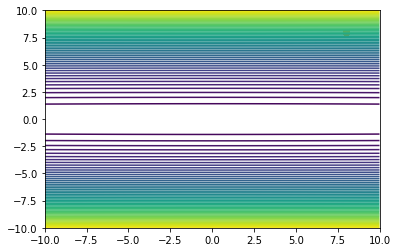

In [9]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1)

-----
norm of p:  11.313708498984761
delta:  100
[0. 0.]


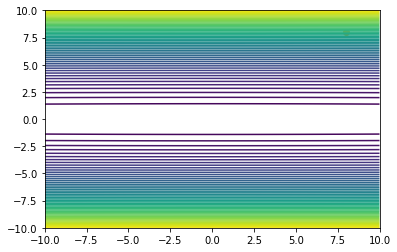

In [14]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e3, delta_init=100)

The newton step is outside the trust region 11.313708498984761
p [-4.01768524 -7.99207828]
||p|| 8.945116541942014
p [-0.4676945  -7.87320066]
||p|| 7.887079738621785
p [-0.01536151 -5.26391282]
||p|| 5.263935238312371
p [-0.00409916 -2.71129339]
||p|| 2.711296492113245
p [-0.00182719 -1.48773293]
||p|| 1.4877340502045182
p [-0.00118169 -1.02973642]
||p|| 1.0297371014223766
p [-0.00115722 -1.01110833]
||p|| 1.0111089956627999
p [-0.00116448 -1.01664462]
||p|| 1.0166452864016253
p [-0.00115368 -1.00840176]
||p|| 1.0084024169203414
p [-0.0011584  -1.01200423]
||p|| 1.0120048916361701
----
The newton step is outside the trust region 11.313708498984761
p [-4.01768524 -7.99207828]
||p|| 8.945116541942014
p [-0.4676945  -7.87320066]
||p|| 7.887079738621785
p [-0.01536151 -5.26391282]
||p|| 5.263935238312371
p [-0.00409916 -2.71129339]
||p|| 2.711296492113245
p [-0.00182719 -1.48773293]
||p|| 1.4877340502045182
p [-0.00118169 -1.02973642]
||p|| 1.0297371014223766
p [-0.00115722 -1.01110833]
|

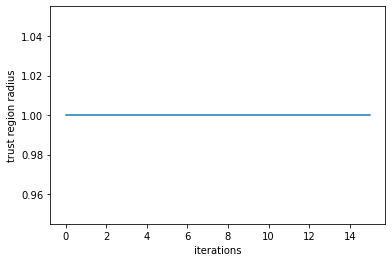

In [16]:
deltas_ellipsoid, ps_ellipsoid, rhos_ellipsoid, xs_ellipsoid = plot_delta_from_function(TrustRegion.minimize, Ellipsoid, delta_init=1)

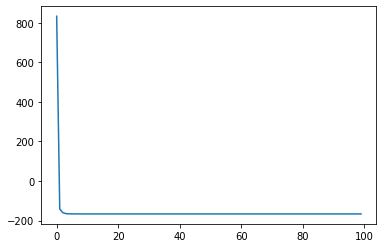

In [12]:
norms_ellipsoid = []
for p in ps_ellipsoid:
    norms_ellipsoid.append(np.linalg.norm(p[0]))
plt.plot((np.append(np.array([1e3]), np.array(deltas_ellipsoid)[:-1]) - np.array(norms_ellipsoid)))

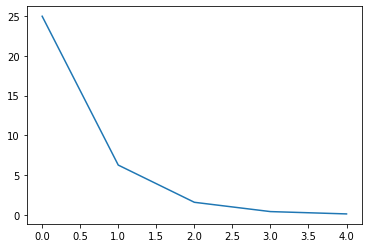

In [13]:
plt.plot(deltas_ellipsoid[0:5])

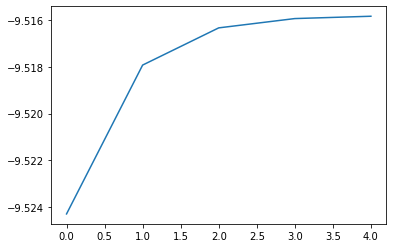

In [14]:
plt.plot(rhos_ellipsoid[0:5])

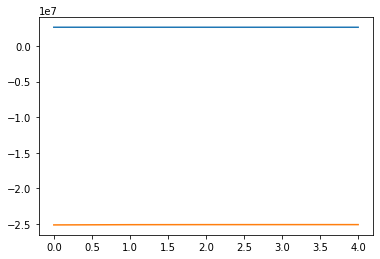

In [15]:
def m(p, x):
    return Ellipsoid.f(x) + np.array(Ellipsoid.gradient(x)).T @ p + 0.5 * p.T @ Ellipsoid.hessian(x) @ p
plt.plot([m(np.zeros(len(x)), x) - m(p, x) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
plt.plot([Ellipsoid.f(x) - Ellipsoid.f(x + p) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
#plt.plot(rhos_ellipsoid[0:5])
#plt.plot(deltas_ellipsoid[0:5])

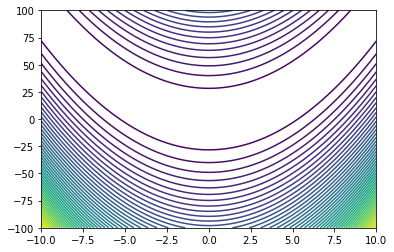

In [16]:
plot_contour(Rosenbrock.f, xs=10, ys=100)

-----
x:  [8, 8]
f(x):  313649
f_grad(x):  [179214 -11200]
f_hess(x): [[73602 -3200]
 [-3200   200]]
[-2.00076675  9.80459755] 148.35049341346698
delta for next iter 100
rho 1.1281869198449885
p (array([-2.00076675,  9.80459755]), 148.35049341346698)
p_norm 10.006657817146227
m 64975.47960550373
-----
x:  [ 5.99923325 17.80459755]
f(x):  33098.78697912333
f_grad(x):  [43651.30580546 -3637.24041801]
f_hess(x): [[36069.12054728 -2399.69330171]
 [-2399.69330171   200.        ]]
[-0.54265305 10.02646495] 14.376807212153812
delta for next iter 100
rho 1.0304163484384654
p (array([-0.54265305, 10.02646495]), 14.376807212153812)
p_norm 10.041138970641681
m 1362.7597254192078
-----
x:  [ 5.4565802 27.8310625]
f(x):  397.4656624179114
f_grad(x):  [4250.21466441 -388.6409939 ]
f_hess(x): [[24598.69596646 -2182.63207979]
 [-2182.63207979   200.        ]]
[ 1.29850130e-108 -1.18735376e-109] -3.2731693503142053e+111
delta for next iter 100
rho nan
p (array([ 1.29850130e-108, -1.18735376e-109]), -3.

/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:24: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x) - f(x+p))/(m(np.zeros(len(x)), x) - m(p, x))


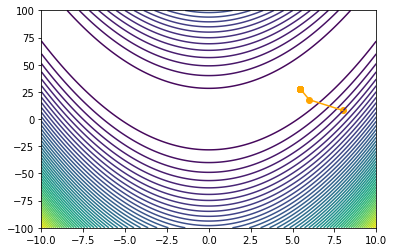

In [17]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100, debug=True, max_iterations=17, lambda_init=0)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector)

[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.7019092

[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.7019092

[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.7019092

[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.70190924e-29 3.45844383e-27] -5.921738507854844e+29
[2.7019092

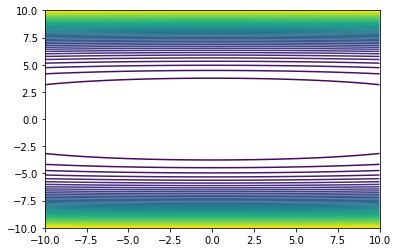

In [18]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, debug=False)

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))

In [ ]:
np.linalg.norm(np.array([-1/np.sqrt(2), -1/np.sqrt(2)]))

In [ ]:
q_1 = np.array([0.99905465, -0.04347186])
lambda1 = 7.37412416e+04
